In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from tqdm import tqdm
import pickle
import scipy.io as sio

In [ ]:
path = "Models/newImdb/imdbCom.mat"

# Usage
with h5py.File(path, "r") as f:
    print(list(f.keys()))
    data = f["imdb"][()]
    a = [[f[data[i][j]][()] for j in range(4)] for i in tqdm(range(len(data)))]

OSError: Unable to synchronously open file (file signature not found)

In [94]:
with open('Models/imdb_combined.pkl', 'wb') as f:
    pickle.dump(a, f)

In [4]:
with open("data/imdbs/imdb_combined.pkl", "rb") as f:
    a = pickle.load(f)

In [5]:
# 1: train, 2: val
np.unique(np.array([x[1] for x in a]).squeeze(), return_counts=True)

(array([1, 2], dtype=uint8), array([180000,  20000]))

In [89]:
def contrast_stretch(img):
    img = img.copy()
    sub_img = img > 0
    tmp = img[sub_img]
    img[sub_img] = (tmp - tmp.min()) / (tmp.max() - tmp.min())
    return img

[[126.86989765]]


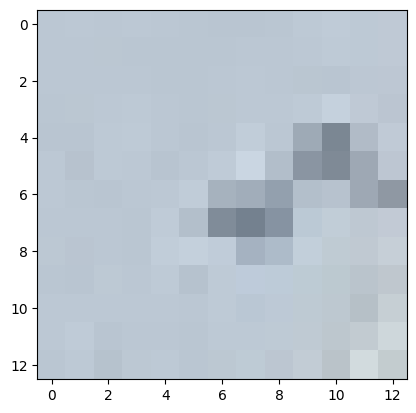

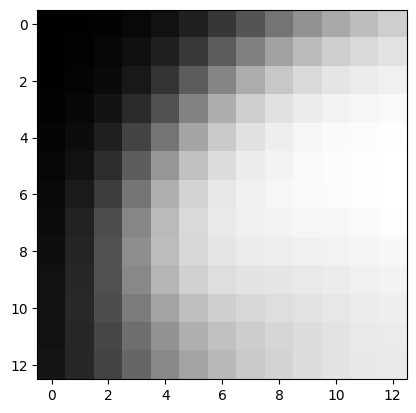

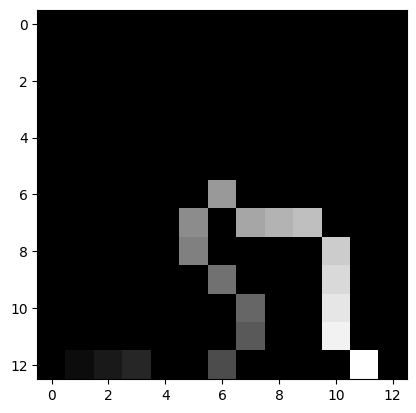

In [93]:
# index 0: rgb
# index 1: dataset split
# index 2: angle
# index 3: contours
i = 0
img = a[i][0][...,:3]
cont = a[i][0][...,3]
clock_wise = a[i][3]
print(a[i][2])
plt.imshow(img / 65535, cmap='gray')
plt.show()
plt.imshow(cont / 65535, cmap='gray')
plt.show()
plt.imshow(contrast_stretch(clock_wise.astype(np.float32)), cmap='gray')
plt.show()

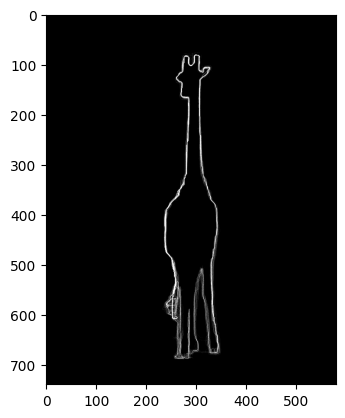

In [13]:
img = sio.loadmat("data/000000212895.mat")["grey"]
plt.imshow(img, cmap="gray", vmin=0, vmax=1)